In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
kings_data = pd.read_csv("../Resources/cleaned_df.csv")

In [3]:
kings_data.head()

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,Golden State Warriors,11370786,28,79,71,8,34.2,30.1,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
1,2015,Shaun Livingston,Golden State Warriors,5543725,30,78,69,9,19.5,6.3,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
2,2015,Marreese Speights,Golden State Warriors,3815000,28,72,64,8,11.6,7.1,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
3,2015,Leandro Barbosa,Golden State Warriors,2500000,33,68,60,8,15.9,6.4,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
4,2015,Klay Thompson,Golden State Warriors,15501000,26,80,71,9,33.3,22.1,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31


In [4]:
kings_cleansed_df = kings_data.loc[kings_data['TEAM']== 'Sacramento Kings']
kings_cleansed_df = kings_cleansed_df.loc[kings_cleansed_df['YEAR']== 2016]
kings_cleansed_df

,YEAR,PLAYER,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
26,2016,Matt Barnes,Sacramento Kings,242224,37,20,16,4,20.5,5.7,...,2.3,1.2,0.6,0.5,2.4,16.5,0,0,1.7,560
240,2016,Anthony Tolliver,Sacramento Kings,8000000,32,65,26,39,22.7,7.1,...,1.2,0.9,0.5,0.3,1.7,14.9,1,0,-1.5,126
241,2016,Arron Afflalo,Sacramento Kings,12500000,31,61,23,38,25.9,8.4,...,1.3,0.7,0.3,0.1,1.7,13.5,0,0,-4.0,77
242,2016,Ben McLemore,Sacramento Kings,4008882,24,61,27,34,19.3,8.1,...,0.8,1.0,0.5,0.1,1.8,12.6,1,0,-2.2,212
243,2016,Buddy Hield,Sacramento Kings,3517200,24,25,8,17,29.1,15.1,...,1.8,2.1,0.8,0.1,1.4,23.2,0,0,-2.5,236
244,2016,Darren Collison,Sacramento Kings,5229454,29,68,26,42,30.3,13.2,...,4.6,1.7,1.0,0.1,1.8,24.5,4,0,-1.9,187
245,2016,DeMarcus Cousins,Sacramento Kings,16957900,26,55,23,32,34.4,27.8,...,4.8,3.8,1.4,1.3,3.7,52.1,34,2,-0.5,45
246,2016,Garrett Temple,Sacramento Kings,8000000,31,65,25,40,26.6,7.8,...,2.6,1.2,1.3,0.4,2.2,19.0,0,0,-2.7,128
247,2016,Georgios Papagiannis,Sacramento Kings,2202240,19,22,7,15,16.1,5.6,...,0.9,1.1,0.1,0.8,2.0,13.3,2,0,-1.4,293
248,2016,Jordan Farmar,Sacramento Kings,980431,30,2,1,1,17.7,6.0,...,4.5,1.5,1.0,0.0,0.5,16.1,0,0,-0.5,394


([<matplotlib.axis.YTick at 0x24fffdab2b0>,
 <a list of 20 Text yticklabel objects>)

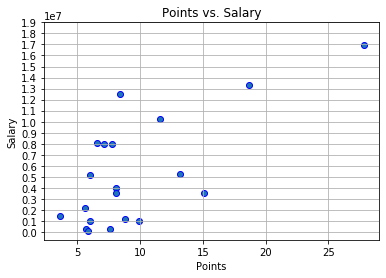

In [5]:
x_PTS = kings_cleansed_df['PTS']
y_Salary = kings_cleansed_df['SALARY']
plt.scatter(x_PTS,y_Salary,marker = 'o',edgecolors = 'blue')
plt.title("Points vs. Salary")
plt.xlabel("Points")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24fffe87048>,
 <a list of 20 Text yticklabel objects>)

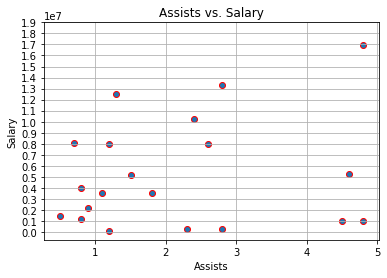

In [6]:
x_assists = kings_cleansed_df['AST']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_assists,y_Salary,marker = 'o',edgecolors = 'red')
plt.title("Assists vs. Salary")
plt.xlabel("Assists")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24ffff23048>,
 <a list of 20 Text yticklabel objects>)

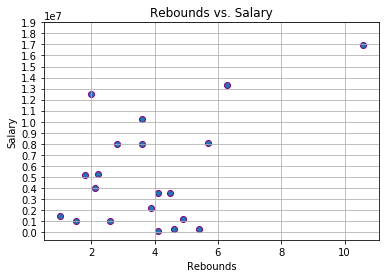

In [7]:
x_rebound = kings_cleansed_df['REB']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_rebound,y_salary,marker = 'o',edgecolors = 'purple')
plt.title("Rebounds vs. Salary")
plt.xlabel("Rebounds")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24f81023fd0>,
 <a list of 20 Text yticklabel objects>)

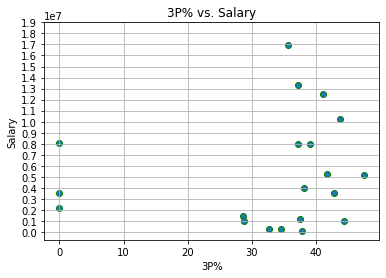

In [9]:
x_three = kings_cleansed_df['3P%']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_three,y_salary,marker = 'o',edgecolors = 'green')
plt.title("3P% vs. Salary")
plt.xlabel("3P%")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))

([<matplotlib.axis.YTick at 0x24f810abf60>,
 <a list of 20 Text yticklabel objects>)

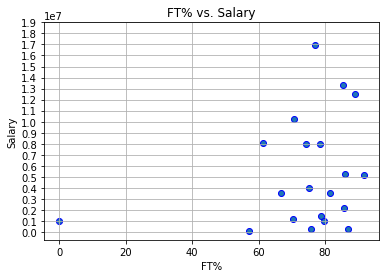

In [10]:
x_free = kings_cleansed_df['FT%']
y_salary = kings_cleansed_df['SALARY']
plt.scatter(x_free,y_salary,marker = 'o',edgecolors = 'blue')
plt.title("FT% vs. Salary")
plt.xlabel("FT%")
plt.ylabel("Salary")
plt.grid()
plt.yticks(np.arange(0,20000000,1000000))